In [1]:
import tellurium as te
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import cobra
import os
os.getcwd()

from src.no_BayesianInference import BMCA, util

Generating data for running through the pipeline.

Running BMCA on BioModel 64

In [2]:
# load the Teusink model
Teusink_ant = 'data/interim/Antimony/BIOMD0000000064_e.ant'
data_file = 'data/interim/generated_data/BIOMD0000000064_e_0.csv'
data = pd.read_csv(data_file)

Comparing flux values, original and perturbed

In [4]:
_ = data.transpose().sort_index()
# _.rename({0: "unperturbed ss", 1: "EtOH -50%"}, axis=1, inplace=True)
_.loc['v_':'v_z']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
v_vADH,129.215909,126.074232,131.301487,129.175587,129.247051,130.624826,127.775393,130.313187,128.103523,129.184641,129.239383,129.209453,129.220942,128.353801,129.991105,129.190077,129.237081,129.194725,129.233139,129.154919,129.260850,129.185544,129.239248,129.190999,129.227699,130.431801,128.075222,113.207883,144.801531,128.810086,129.552723,131.153060,127.328554,130.331846,127.912646,129.215909,129.215909,129.215909,129.215909,129.215909,129.215909,129.215909,129.215909,128.768847,129.583231,130.334496,128.162364,129.117064,129.313707,129.197643,129.231392
v_vALD,77.349527,75.631215,78.491249,77.327463,77.366568,78.130239,76.553521,77.955666,76.736059,77.332417,77.362372,77.345994,77.352281,77.223640,77.458585,77.345827,77.352556,77.346493,77.351993,77.340784,77.355954,77.345177,77.352866,77.345959,77.351214,77.508743,77.193025,68.598840,85.931217,77.294658,77.394400,77.598212,77.087700,78.050919,76.591666,77.349527,77.349527,77.349527,77.349527,77.349527,77.349527,77.349527,77.349527,77.104912,77.550541,77.496281,77.205232,77.336306,77.362556,77.339532,77.357999
v_vATP,84.532764,81.686034,86.420476,84.496249,84.560966,86.989173,82.043744,86.235042,82.814929,84.504448,84.554022,84.526918,84.537322,83.060322,85.865039,84.488501,84.569049,84.496464,84.562294,84.428270,84.609791,84.480734,84.572763,84.490080,84.552969,86.646117,82.564395,70.018086,98.540628,83.830855,85.116646,87.909697,81.281710,85.361854,83.441960,84.532764,84.532764,84.532764,84.532764,84.532764,84.532764,84.532764,84.532764,84.127871,84.865379,86.476431,82.714263,84.361517,84.702302,84.516223,84.546785
v_vENO,136.496807,133.270860,138.638919,136.455398,136.528790,137.949298,135.013006,137.626943,135.351693,136.464696,136.520915,136.490178,136.501976,135.809081,137.112838,136.476242,136.513662,136.479942,136.510524,136.448247,136.532581,136.472632,136.515386,136.476975,136.506193,137.456283,135.592602,120.062110,152.533217,136.175580,136.763031,138.022593,134.999081,137.694701,135.132842,136.496807,136.496807,136.496807,136.496807,136.496807,136.496807,136.496807,136.496807,136.037698,136.874045,137.379658,135.661821,136.418649,136.574109,136.478049,136.512708
v_vG3PDH,18.202246,17.991570,18.343579,18.199527,18.204347,18.311181,18.094035,18.284389,18.120425,18.200138,18.203829,18.201811,18.202586,18.638199,17.804333,18.215412,18.191451,18.213043,18.193461,18.233320,18.179327,18.217721,18.190346,18.214942,18.196236,17.561203,18.793448,17.135569,19.329216,18.413736,18.025770,17.173831,19.176318,18.407137,18.050490,18.202246,18.202246,18.202246,18.202246,18.202246,18.202246,18.202246,18.202246,18.172126,18.227037,17.612904,18.748643,18.253962,18.151004,18.201015,18.203290
v_vGAPDH,136.496807,133.270860,138.638919,136.455398,136.528790,137.949298,135.013006,137.626943,135.351693,136.464696,136.520915,136.490178,136.501976,135.809081,137.112838,136.476242,136.513662,136.479942,136.510524,136.448247,136.532581,136.472632,136.515386,136.476975,136.506193,137.456283,135.592602,120.062110,152.533217,136.175580,136.763031,138.022593,134.999081,137.694701,135.132842,136.496807,136.496807,136.496807,136.496807,136.496807,136.496807,136.496807,136.496807,136.037698,136.874045,137.379658,135.661821,136.418649,136.574109,136.478049,136.512708
v_vGLK,88.149527,86.431215,89.291249,88.127463,88.166568,88.330239,87.953521,88.275666,88.016059,88.132417,88.162372,88.145994,88.152281,88.023640,88.258585,88.145827,88.152556,88.146493,88.151993,88.140784,88.155954,88.145177,88.152866,88.145959,88.151214,88.308743,87.993025,79.398840,96.731217,88.094658,88.194400,88.398212,87.887700,88.850919,87.391666,88.149527,88.149527,88.149527,88.149527,88.149527,88.149527,88.149527,88.149527,87.904912,88.350541,88.296281,88.005232,88.136306,88.162556,88.139532,88.157999
v_vGLT,88.149527,86.431215,89.291249,88.127463,88.166568,88.330239,87.953521,88.

Calculating the steady state concentrations of the Teusink model when EtOH concentration is halved. 

Predicting the steady state concentration values 

In [ ]:
r = te.loada(Teusink_ant)
BIOMD64 = BMCA.BMCA(Teusink_ant, data_file, desired_product='ETOH')
chi = BIOMD64.calculate_Smallbone_ss(BIOMD64.Ex, BIOMD64.Ey)
print(np.exp(chi.to_numpy()))

In [8]:
x_ss = np.exp(chi_star.to_numpy())
a = s.getIndependentFloatingSpeciesIds()
b = s.getFloatingSpeciesIds()
squiggle_idx = [b.index(i) for i in a if i in b]
squiggle_idx.sort()
estimated_ss = pd.DataFrame(data=x_ss, index=[b[i] for i in squiggle_idx], columns=['estimated'])

In [9]:
comparison = pd.concat([true_ss_values, estimated_ss], axis = 1)
comparison['error (%)'] = (comparison['estimated'])/comparison['true']
comparison.sort_index()

,true,estimated,error (%)
ACE,0.170114,0.189530,1.114133
BPG,0.000330,0.015044,45.647210
F16P,0.601908,0.008905,0.014795
F6P,0.112813,0.037363,0.331192
G6P,1.033246,0.037087,0.035894
GLCi,0.098759,0.395924,4.009007
NAD,1.545560,19.125750,12.374643
NADH,0.044440,NaN,NaN
P,6.308882,0.236591,0.037501
P2G,0.044844,0.055296,1.233077


Plotting relative changes in EtOH by relative changes in steady state intracelluar metabolite concentrations (Figure 3 in Smallbone et al. )

In [36]:
EtOH_scale = np.logspace(-1, 1, num=22)[:-2]
EtOH_scale

array([0.1       , 0.12451971, 0.15505158, 0.19306977, 0.24040992,
       0.29935773, 0.37275937, 0.46415888, 0.57796929, 0.71968567,
       0.8961505 , 1.11588399, 1.38949549, 1.73019574, 2.15443469,
       2.6826958 , 3.34048498, 4.15956216, 5.17947468, 6.44946677])

In [47]:
def calculate_relative_change(metabolite): 
    metabolite_scale = []

    for change in EtOH_scale: 
        s.resetAll()
        s.ETOH =(change * s.ETOH)
        # print(s.ETOH)
        s.steadyState()
        
        #s.simulate(0,50)
        #s.plot(title=change)
        
        metabolite_scale.append(s.getValue(metabolite))

    # calculate the relative change in BPG
    s.resetAll()
    s.steadyState()
    met_ss = s.getValue(metabolite)
    met_scale = np.array(metabolite_scale) / met_ss

    return met_scale

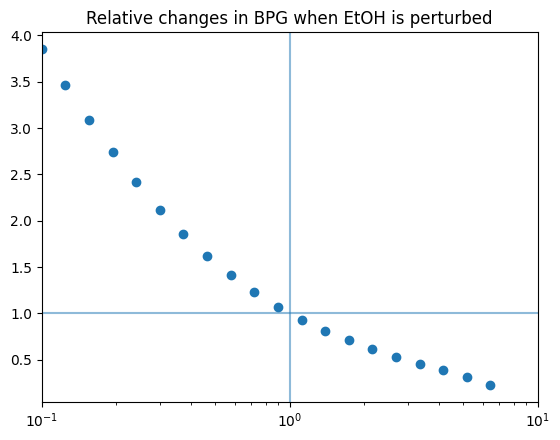

In [140]:
plt.scatter(EtOH_scale, calculate_relative_change('BPG'))
plt.xscale('log', base=10)
plt.xlim(0.1, 10)
plt.title('Relative changes in BPG when EtOH is perturbed')
plt.axvline(1, alpha=0.5)
plt.axhline(1, alpha=0.5)

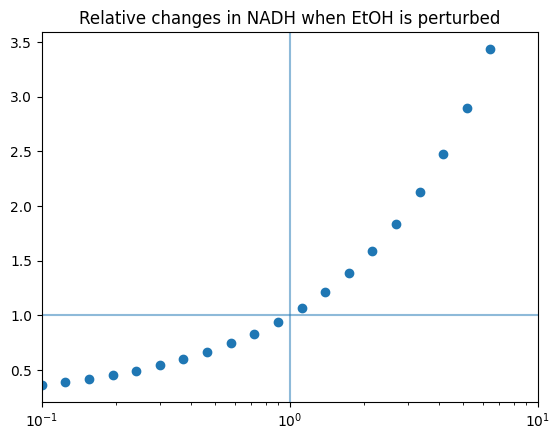

In [141]:
plt.scatter(EtOH_scale, calculate_relative_change('NADH'))
plt.xscale('log', base=10)
plt.xlim(0.1, 10)
plt.title('Relative changes in NADH when EtOH is perturbed')
plt.axvline(1, alpha=0.5)
plt.axhline(1, alpha=0.5)